In [1]:
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.stats.api as sms

from db import conn

/u3/z3tu/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline

In [3]:
sns.set_style("whitegrid")

In [4]:
cursor = conn.cursor()

In [21]:
def get_qa_df(dataset):
    experiment_rows = [r for r in cursor.execute("""
        select
        json_extract(args, '$.dataset') as dataset,
        json_extract(args, '$.max_window_size') as w,
        avg(json_extract(dev_metric, '$.map')) as dev_map,
        avg(json_extract(test_metric, '$.map')) as test_map
        from experiments e
        join experiment_groups g on e.group_id=g.gid
        where g.name=? and dataset=?
        group by w""", ('mpcnn-v2-lite-increase-window-sizes', dataset))]
    
    df_rows = []
    for r in experiment_rows:
        df_rows.append({
            'dataset': r[0],
            'w': r[1],
            'Dev MAP': r[2],
            'Test MAP': r[3]
        })

    df = pd.DataFrame(df_rows)
    df = df.set_index('w')
    return df

## TrecQA

In [22]:
trecqa_df = get_qa_df('trecqa')

In [23]:
trecqa_df

,Dev MAP,Test MAP,dataset
w,,,
1,0.68922,0.65969,trecqa
2,0.78212,0.78511,trecqa
3,0.79060,0.77317,trecqa
4,0.78441,0.77546,trecqa
5,0.75921,0.73939,trecqa
6,0.72971,0.71480,trecqa


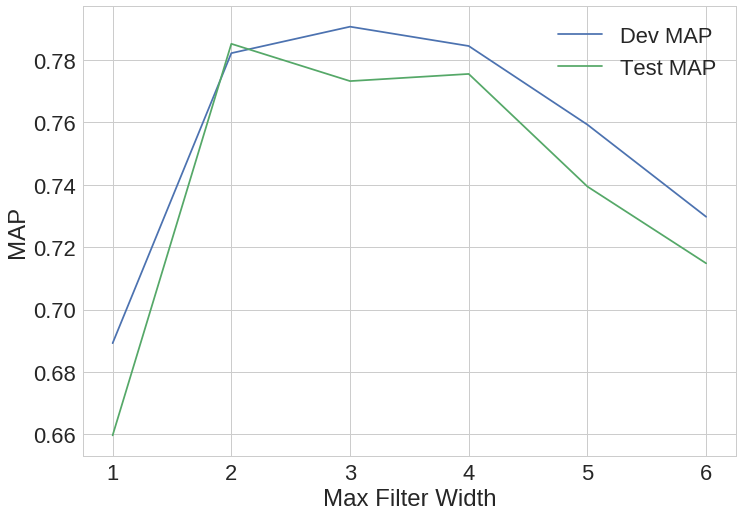

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
trecqa_df.plot(ax=ax)
plt.xlabel('Max Filter Width', fontsize=24)
plt.ylabel('MAP', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(prop={'size': 22})

## WikiQA

In [25]:
wikiqa_df = get_qa_df('wikiqa')

In [26]:
wikiqa_df

,Dev MAP,Test MAP,dataset
w,,,
1,0.66742,0.65006,wikiqa
2,0.74007,0.69490,wikiqa
3,0.74522,0.69331,wikiqa
4,0.74541,0.68837,wikiqa
5,0.68618,0.63969,wikiqa
6,0.64751,0.60483,wikiqa


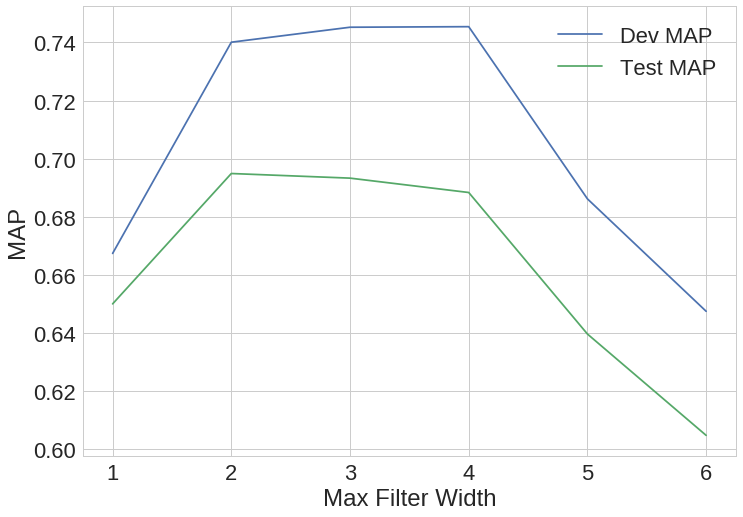

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
wikiqa_df.plot(ax=ax)
plt.xlabel('Max Filter Width', fontsize=24)
plt.ylabel('MAP', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(prop={'size': 22})

## SICK

In [33]:
def get_sick_df():
    experiment_rows = [r for r in cursor.execute("""
        select
        json_extract(args, '$.dataset') as dataset,
        json_extract(args, '$.max_window_size') as w,
        avg(json_extract(dev_metric, '$.pearson')) as dev_map,
        avg(json_extract(test_metric, '$.pearson')) as test_map
        from experiments e
        join experiment_groups g on e.group_id=g.gid
        where g.name=? and dataset=?
        group by w""", ('mpcnn-v2-lite-increase-window-sizes', 'sick'))]
    
    df_rows = []
    for r in experiment_rows:
        df_rows.append({
            'dataset': r[0],
            'w': r[1],
            'Dev Pearson': r[2],
            'Test Pearson': r[3]
        })

    df = pd.DataFrame(df_rows)
    df = df.set_index('w')
    return df

In [34]:
sick_df = get_sick_df()

In [35]:
sick_df

,Dev Pearson,Test Pearson,dataset
w,,,
1,0.870193,0.876108,sick
2,0.874336,0.877097,sick
3,0.873396,0.876117,sick
4,0.867947,0.871926,sick
5,0.863602,0.867896,sick
6,0.830869,0.829096,sick


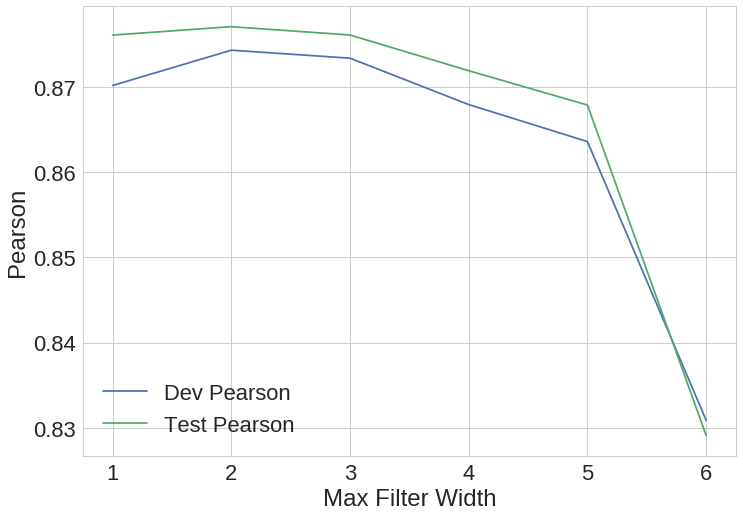

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sick_df.plot(ax=ax)
plt.xlabel('Max Filter Width', fontsize=24)
plt.ylabel('Pearson', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(prop={'size': 22})

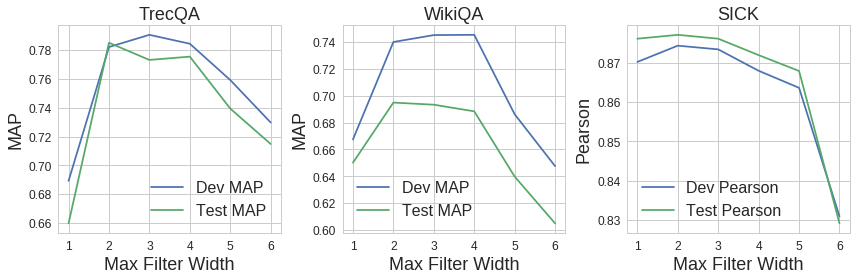

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)

ticksize = 12
axissize = 18
legendsize = 16
titlesize = 18

ax = plt.subplot(131)
trecqa_df.plot(ax=ax)
plt.xlabel('Max Filter Width', fontsize=axissize)
plt.ylabel('MAP', fontsize=axissize)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.legend(prop={'size': legendsize})
plt.title('TrecQA', fontsize=titlesize)

ax = plt.subplot(132)
wikiqa_df.plot(ax=ax)
plt.xlabel('Max Filter Width', fontsize=axissize)
plt.ylabel('MAP', fontsize=axissize)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.legend(prop={'size': legendsize})
plt.title('WikiQA', fontsize=titlesize)

ax = plt.subplot(133)
sick_df.plot(ax=ax)
plt.xlabel('Max Filter Width', fontsize=axissize)
plt.ylabel('Pearson', fontsize=axissize)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.legend(prop={'size': legendsize})
plt.title('SICK', fontsize=titlesize)

plt.tight_layout()
plt.savefig('optimal_max_width.pdf')